# Naive Bayes

In this notebook, we introduce the naive Bayes classifier, which relates the probability an instance belongs to a given target class  to the prior probability of each feature and the joint probability of the given set of features given the target class. By making an implicit assumption of conditional independence, this joint probability can be simplified into a product of individual conditional probabilities for each feature. By using this with Bayes theorem, we get the final probabilistic classification, given a set of features. This algorithm can be quick to apply, once the model is trained, and can often provide reasonable results, which can be used on its own, or as a comparative benchmark for more advanced techniques.

In this notebook, we first explore the probability concepts behind this classifier. Next, the naive Bayes classification algorithm is introduced by using the Iris data.

Before proceeding with the Formalism section of this Notebook, we first have our standard notebook setup code

In [0]:
% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from google.colab import files
src = list(files.upload().values())[0]
# open('help_functions_bayes.py ','wb').write(src)
from help_functions_bayes import *

Saving help_functions_bayes.py to help_functions_bayes.py


## Classification
* **Input** : Measurements $x^{(1)} ,\ldots, x^{(n)}$ in an input space $\mathcal{X} \in \mathbb{R}^d $. Each measurement $x^{(i)} $ consists of $d$ features.

* **Output** : The discrete output space $\mathcal{Y}$ is composed of $K$ possible classes : 
  * $ \mathcal{Y}= \{− 1 , + 1 \}$ or $\{ 0 , 1 \}$ is called binary classification. 
  * $ \mathcal{Y} = \{ 1,\ldots, K \}$ is called multiclass classification.
  
  


For example, if we consider a subset of **features** like smoker and day features, and we wish to **classify** the time of day when the meal was served, we have the following two possible probabilities:
* P(lunch | smoker, day) and 
* P(dinner | smoker, day).

### Example Text Classification
* Spam detection
* Age/gender identification
* Language Identification
* Assigning subject categories, topics, or genres
* ...

## The Bayes Classifier:

Under the assumption $( X , Y ) \overset{\text{iid}}{\sim} \mathcal{P}$ , the optimal classifier is
$$f^* ( x ) := \arg \max_{ y \in \mathcal{Y}  }P(Y = y | X = x ) $$

From Bayes rule we equivalently have
$$ f^* ( x ) = \arg \max_{ y \in \mathcal{Y}  } P(X = x  | Y = y ) \times P(Y = y )$$
$$f^*( x ) := \arg\max_{ y \in  \mathcal{Y} }P(x_1, \ldots, x_d |Y = y  ) P(Y = y ) $$

where:
* $P ( X = x | Y = y )$ is called the class conditional distribution of $X$ .
* $P ( Y = y )$ is called the class prior .
* In practice we don’t know either of these, so we approximate them.



## NAIVE BAYES

We have to define $P( X = x | Y = y )$ .  

**Simplifying assumption:** Naive Bayes is a Bayes classifier that makes the assumption
$P ( X = x | Y = y ) = \prod_{j=1}^d P( x_j | Y = y )$ .

i.e., it treats the dimensions of $X$ as conditionally independent given $y$

One approach to computing the conditional probabilities was demonstrated in the Lecture. A problem with simply using the counts from a training data set, however, is that the entire process becomes completely deterministic, which means that the same result occurs every time we run the algorithm.  
In some cases this would not be a problem, but in general, we want to account for the fact that any data we have collected (or sampled) is merely a subset of the true parent population that we wish to quantify. If we were to collect a second data set (or sample), we likely would produce a different training data set. 



## Naive Bayes: Classification

When applying the naive Bayes algorithm, we must choose a specific classifier that assumes the features are sampled from a relevant distribution. 

In the `scikit learn` library, we can employ the naive Bayes algorithm by creating one of three estimators, which are all in the `naive_bayes` module:

* [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html): the features are assumed to follow a normal distribution.
* [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html): the features are assumed to follow a multinomial distribution.
* [Bernoulli Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html): the features are assumed to follow a binomial distribution.


## Gaussian Naive Bayes
In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. 

### Example 1:

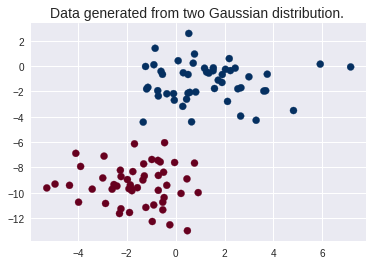

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.title('Data generated from two Gaussian distribution. ', size=14)
plt.show()

The Gaussian naive Bayes estimator takes one hyperparameter: `priors`, which are the prior probabilities of the different classes.

### Task 1:
Deine a [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) and  fit it according to X, y

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

IF your answer was not correct for any reason run the following cell to get the answer

In [0]:
model = task1_answer(X,y)

#### Naive Bayes: Decision Surface

We now compute and display the decision surface for the naive Bayes classifier. 
* First, we create a mesh (or grid of points in two-dimensions) that spans the features. 
* Next, we fit a naive Bayes classifier to the training data in these two dimensions, before applying this model to the test data and the two-dimensional mesh. 

The resulting figure shows the non-linear nature of this classifier, especially when using the GaussianNB estimator.

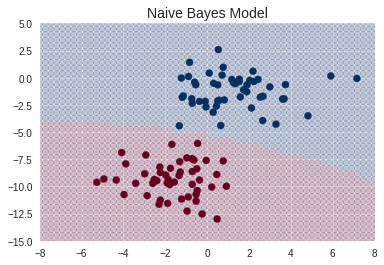

In [7]:
# Construct mesh grid data
x_1lim = (-8, 8)
x_2lim = (-15, 5)
x_1g = np.linspace(x_1lim[0], x_1lim[1], 60)
x_2g = np.linspace(x_2lim[0], x_2lim[1], 40)
xx, yy = np.meshgrid(x_1g, x_2g)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

# Fit a naive Bayes classifier to the training data 
# X, Y

# Predict for mesh grid
z = model.predict(Xgrid)

# Plot
fig, ax = plt.subplots()
plt.scatter(Xgrid[:, 0], Xgrid[:, 1], c=z, s=40, cmap='RdBu',alpha=0.2)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)
ax.set(xlim=x_1lim, ylim=x_2lim)
plt.show()

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.


A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the predict_proba method. Now let's generate some new data and predict the label:

In [8]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(80, 2)

ynew = model.predict(Xnew)
print("ynew",ynew[-10:].round(2))

yprob = model.predict_proba(Xnew)
print("yprob",yprob[-10:].round(2))

ynew [1 1 1 1 1 1 1 1 1 0]
yprob [[0.01 0.99]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]]


The columns give the posterior probabilities of the first and second label, respectively.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results. 

Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

## Multinomial Naive Bayes:

Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution. 

The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.



### Example 2: Classifying Text
 One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified

In [9]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We take only a subset of the data

In [0]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [11]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.




### Text Features

Another common need in feature engineering is to convert text to a set of representative numerical values. One of the simplest methods of encoding data is by word counts: you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

For example, consider the following set of three phrases:


In [0]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem',
         'of and a',
         'of the a',]

While doing this by hand would be possible, the tedium can be avoided by using Scikit-Learn's CountVectorizer:

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<5x7 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

It is easier to inspect if we convert this to a DataFrame with labeled columns:

In [14]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

and  evil  horizon  of  problem  queen  the
0    0     1        0   1        1      0    0
1    0     1        0   0        0      1    0
2    0     0        1   0        1      0    0
3    1     0        0   1        0      0    0
4    0     0        0   1        0      0    1

The raw word counts lead to features which put too much weight on words that appear very frequently, and this can be sub-optimal in some classification algorithms. One approach to fix this is known as term frequency-inverse document frequency (TF–IDF).which weights the word counts by a measure of how often they appear in the documents but offset them by the number of times the word appears in the entire dataset. This offset helps remove the importance from really common words  like "the" or "a". The syntax for computing these features is similar to the previous example:

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

and      evil   horizon        of   problem     queen       the
0  0.000000  0.609818  0.000000  0.506204  0.609818  0.000000  0.000000
1  0.000000  0.627914  0.000000  0.000000  0.000000  0.778283  0.000000
2  0.000000  0.000000  0.778283  0.000000  0.627914  0.000000  0.000000
3  0.830881  0.000000  0.000000  0.556451  0.000000  0.000000  0.000000
4  0.000000  0.000000  0.000000  0.556451  0.000000  0.000000  0.830881

### Example 2 (Continue)
Create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

### Task 2:
With this pipeline, you can apply the model to the training data. 

In [0]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)

IF your answer was not correct for any reason run the following cell to get the answer

In [0]:
model = task2_answer(train)

Next use the model to predict labels for the test data:

In [0]:
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. For example, here is the confusion matrix between the true and predicted labels for the test data:

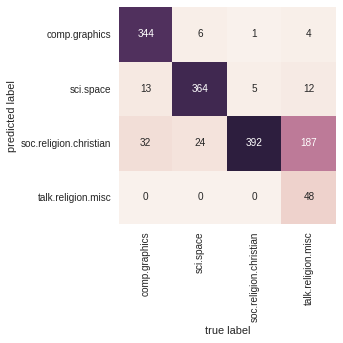

In [19]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity. This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for any string, using the `predict()` method of this pipeline. Here's a quick utility function that will return the prediction for a single string:


In [0]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [21]:
predict_category('sending a payload to the ISS')

'sci.space'

In [22]:
predict_category('determining the screen resolution')

'comp.graphics'

## Conclusion:
This algorithm can be quick to apply, once the model is trained, and can often provide reasonable results, which can be used on its own, or as a comparative benchmark for more advanced techniques.  It  has very few (if any) tunable parameters.

As the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in every single dimension to be close overall). This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.